# 机器学习理论基础

## 采样和评估方法

### 留出法（hold-out）

直接将数据集D分成两个互斥的集合，其中一个做训练集S，另一个做测试集T。**训练/测试集的划分要尽可能保持数据分布的一致性，至少要保证样本类别的比例相似。**从采样的角度看数据划分过程，保留类别比例的采样方式通常称为**“分层采样”**。

单次使用留出法得到的估计结果不够稳定可靠，一般要采用若干次随机划分、重复进行实验评估后取平均值作为留出法的评估结果。

### K折交叉验证法

当数据集有十万计或更多的样本时，通过留出法就可以进行统计训练集和测试集的误差。当数据集太小时，我们很难通过留出法来估计算法的真实性能，这个时候我们可以通过“k折交叉验证法”来进行验证。

将数据集D划分成k个大小相似的互斥子集，即$D = D_1\cup D_2 \cup ...\cup D_k, D_i\cup D_j = \emptyset (i \neq j)$。每个子集从D中分层采样得到，每次用k-1个子集的并集作为训练集，余下的子集作为测试集；从而进行k次训练测试，返回均值。通常也称为“k折交叉验证”(k-fold cross validation)，k最常用取值是10。

为了减少样本划分不同的差别，可以重复P次k-fold cross validation，返回均值。

### 自助法(bootstrapping)

hold-out 和 k-fold cross validation都保留了一部分互斥子集作为测试，实际评估的模型使用的训练集是D的子集，会引入因训练样本规模不同带来的估计偏差。

“自助法”(bootstrapping)以自助采样法（bootstrap sampling）为基础，给定包含m个样本的集合D，每次随机从D中挑选一个样本，拷贝放入$D_1$，然后该样本放回到初始数据集D中，使得该样本下次仍可能被采到；重复执行m次，就得到了包含m个样本的数据集$D_1$。

显然，D中有部分样本会在$D_1$中多次出现，而另一部分样本不出现。简单估计，样本在m次采样始终不被采到的概率是$(1-\frac{1}{m})^m$,取极限得到

$$\lim_{m\to\infty} (1-\frac{1}{m})^m \to \frac{1}{e}\approx 0.368$$

通过自主采样，初始数据集中约有36.8%的样本未出现在采样数据集$D_1$中。可以用$D_1$做训练集，$D\setminus D_1$用作测试集。这样的测试结果也叫“包外估计”(out-of-bag estimate)。

**优缺点**：
* 优点：数据集较小、难以有效划分训练/测试集时很有用；bootstrapping能从初始数据集中产生多个不同训练集，对集成学习等方法有很大好处。
* 缺点：bootstrapping改变了初始数据集的分布，会引入估计偏差。因此，初始数据集够时，hold-out和k-fold cross validation更常用。

### 类别不平衡问题

类别不平衡指的就是**分类任务**中不同类别的训练样例比例差别很大。即使原始问题中不同类别的训练样例比例均衡，经过 OvR 、MvM 之后产生的二分类任务仍可能出行不平衡现象。

不失一般性，我们假设正例样例少。令 $m^+$ 表示正例数目， $m^-$ 表示反例数目，观测几率是 $\frac{m^+}{m^-}$，我们通常假设**训练集是真实样本总体的无偏采样。**因此，预测几率高于观测几率应判定为正例，即若

$$\frac{y}{1-y}> \frac{m^+}{m^-}$$

时，预测为正例。所以可以通过“再缩放”（rescaling）来进行类别不平衡学习：

$$\frac{y^\prime}{1-y^\prime} = \frac{y}{1-y}\times \frac{m^-}{m^+}$$

再缩放的思想虽然简单，但实际操作却不平凡，主要是因为**“训练集是真实样本总体的无偏采样”**假设往往并不成立。所以观测几率不一定能代表真实几率。

现在大体上有三种做法：

1. 对反例进行“欠采样”(undersampling)：利用集成学习机制，将反例划分为若干集合供不同学习器学习，对每个学习器进行欠采样，但没有丢失重要信息；
2. 对正例进行“过采样”(oversampling)：不能简单对正例样本进行重复采样，可以通过插值来产生额外正例；
3. 按照原始训练集进行学习，进行预测时，将上面的缩放公式嵌入决策过程，称为“阈值移动”（threshold-moving）。

[详细请参考](https://zhuanlan.zhihu.com/p/34782497)

## 性能度量

### 交叉验证集

1. 为了评估不同模型的性能和准确性，我们使用交叉验证集，其目的是为了保证模型“没见过”测试数据；
2. 我们通过模型的准确性来衡量模型的性能，为了更科学地衡量，我们将数据集分为3份，分别是**训练数据集、交叉验证数据集**和**测试数据集**，推荐比例是6:2:2。如果不使用交叉验证集，推荐**训练数据集、测试数据集**的比例为8:2或者7:3；
3. 实践中，很多人直接把数据分为训练集和测试集，没有分出交叉验证集。这是因为很多时候不需要去横向比较不同模型，工程上我们最主要的工作是**获取、分析、挖掘数据**；

### 成本函数

1. 成本是衡量模型与训练数据符合程度的指标，**成本**是针对所有的训练样本，模型拟合出来的值与训练样本真实值的误差平均值；
2. 模型的成本函数公式如下：
$$ J(\theta)=J(\theta_0,\theta_1)=\frac{1}{2m}\sum_{i=1}^{m}(h(x^{(i)})-y^{(i)})^{2}$$
其中m是训练样本个数，$h(x^{(i)})$是模型对每个样本的预测值，$y(x^{(i)})$是每个样本的真实值；
3. 在scikit-learn中，我们一般不使用成本函数来表达模型性能，而使用score来表达，数值介于[0,1]之间，越大说明准确性越好，举例如下。

In [3]:
from sklearn import datasets, svm
split_num = 100
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target
svc = svm.SVC(C=1, kernel='linear')
svc.fit(X_digits[:-split_num], y_digits[:-split_num]).score(X_digits[-split_num:], y_digits[-split_num:])

0.97999999999999998

### 学习曲线

[画学习曲线官方代码](https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html)

- 以训练集的成本和交叉验证集的成本为纵坐标，以训练集大小m为横坐标，通过学习曲线可以直观观察模型的准确性和训练集大小的关系

**实例：画出学习曲线**

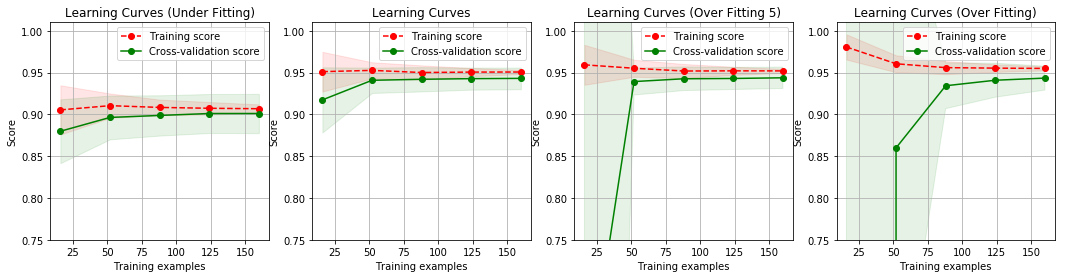

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

n_dots = 200

X = np.linspace(0, 1, n_dots)    
np.random.seed(2)
y = np.sqrt(X) + 0.2*np.random.rand(n_dots) - 0.1;

X = X.reshape(-1, 1)
y = y.reshape(-1, 1)


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def polynomial_model(degree=1):
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),("linear_regression", linear_regression)])
    return pipeline

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o--', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# 为了让学习曲线更平滑，交叉验证数据集的得分计算 10 次，每次都重新选中 20% 的数据计算一遍
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
titles = ['Learning Curves (Under Fitting)',
          'Learning Curves',
          'Learning Curves (Over Fitting 5)',
          'Learning Curves (Over Fitting)']
degrees = [1, 3, 5, 10]

plt.figure(figsize=(18, 4))
for i in range(len(degrees)):
    plt.subplot(1, 4, i + 1)
    plot_learning_curve(polynomial_model(degrees[i]), titles[i], X, y, ylim=(0.75, 1.01), cv=cv)

plt.show()

从上图可以看出：
1. 对于图1，随着训练数据集增大，训练集上和交叉集上的准确性都有所提高，但因为欠拟合，相比图2，score的**整体分数偏低**，**发生高偏差时，增加训练样本数量不会对算法准确性有较大改善**
2. 对于图2，拟合的比较好；
3. 对于图3和图4，随着训练数据集增大，训练集上和交叉集上的准确性都有所提高，但**两者之间间距较大**。这就说明，模型过多学习了训练集上的特性，虽然score偏高，但模型应用到交叉集后，score有了很大的回落，这就是过拟合的表现。

### 查准率和召回率

对于先验概率比较低的事件（比如普通肿瘤中患癌症的概率是0.5%），模型的准确性不能评价一个模型的好坏。我们可以引入另外两个概念，**查准率（precision）**和**召回率（recall）**。

以癌症筛查为例：

| 预测数据 实际数据 | 实际恶性肿瘤 | 实际良性肿瘤 |
| :---------------| :---------- | :---------- |
| 预测恶性肿瘤    | TruePositive | FalsePositive |
| 预测良性肿瘤    | FalseNegative | TrueNegative |

查准率和召回率定义如下：
$$ Precision = \frac{TruePositive}{TruePositive + FalsePositive}$$

$$ Recall = \frac{TruePositive}{TruePositive + FalseNegative}$$

其中 True/False 表示预测结果是否正确， Positive/Negative 表示预测结果是1（恶性肿瘤）或0（良性肿瘤）。所以TruePositive表示正确地预测出恶性肿瘤的数量，其他也是相应的数量。

**处理先验概率比较低的问题时，我们总是把概率较低的事件定义为1.**

在 scikit-learn 中，评估模型性能的算法都在 [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) 里。其中，计算查准率和召回率的API分别是 [sklearn.metrics.precision_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score) 和 [sklearn.metrics.recall_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score) 。

### F1 score

如果现在一个算法的 (precision, recall)是（0.5， 0.4），另外一个是（0.02， 1.0）。哪个好呢？

为了解决这个问题，我们引入 $F_1 Score$的概念：
$$ F_1 Score=2\frac{PR}{P + R}$$

其中 P 是 precision，R 是 recall。理想情况下，P和R都是1，则算出来的$F_1 Score$为1。

在 scikit-learn 中，计算 $F_1 Score$ 的函数是 [sklearn.metrics.f1_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score) 里。

F1度量的一般形式为$F_\beta$，是加权调和平均，定义如下：

$$\frac{1}{F_\beta} =\frac{1}{1+\beta^2}(\frac{1}{P} + \frac{\beta^2}{R}) $$

其中$\beta$度量了 precision 和 recall 的重要性。$\beta=1$ 为标准的 F1; $\beta>1$ 时 precision 有更大影响；$\beta<1$ 时 recall 有更大影响。

### ROC 与 AUC

若一个学习器的ROC（受试者工作特征曲线，Receiver Operating Characteristic Cure）曲线被另一个学习器曲线完全“包住”，则可断言后者的性能优于前者；如果发生交叉，则看ROC曲线下的面积，也就是AUC(Area Under ROC Cure)

## 欠拟合和过拟合

两者的定义：
* **欠拟合**是指模型对训练样本的拟合程度不好，对新数据的预测程度也不好；
* **过拟合**是指模型对训练样本的拟合程度很好，对新数据的预测程度很差；

**偏差与方差**：欠拟合（underfiting）也称为**高偏差**（high bias），过拟合（overfitting）也称为**高方差**（high variance）。下图圆圈中的红色代表真实数据，蓝色的点表示预测数据，横坐标为方差，纵坐标为偏差，显示了真实数据与预测值之间的4种状态。

<img src="figure/偏差与方差.jpg" width="400" hegiht="300" align=left />

通过**学习曲线**和上面的定定义，总结欠拟合和过拟合特征如下：

| 拟合程度 | 训练样本准确性 | $j_{train}(θ)$ | 训练集 score | 交叉集准确性 | $j_{cv}(θ)$ | 交叉集 score | score 差 |
| ------- | :------ | :------ | :------ | :------ | :------ | :------ | :------ |
| 欠拟合 | 低 | 高 | 低 | 低 | 高 | 低 | 相对小 |
| 过拟合 | 高 | 低 | 高 | 低 | 高 | 低 | 相对大 |

通过上表可以得知，可以通过观察随着训练集增大的过程中，训练样本上score和交叉集上score的得分是否_**整体偏低（欠拟合，高偏差）**_或者两者之间的_**score差相对较大（过拟合，高方差）来横向比较不同模型或者一个模型参数变化时的拟合程度**_。

## 算法模型性能优化

当机器学习算法无法很好预测新数据，首先来判断算法模型是**欠拟合还是过拟合？**

如果是过拟合，可以采取措施如下：
* **获取更多的训练数据**，从上面的学习曲线可以看出，增加训练数据有助于模型学到数据的更本质的pattern，改善过拟合问题；
* **减少输入的特征数量**，这样可以减少模型的计算量，同时减少模型的复杂度，改善过拟合的问题；

如果是欠拟合，说明模型过于简单，需要增加模型复杂度：
* **增加有价值的特征**，重新理解训练数据，提取更有价值和更丰富的特征；
* **增加多项式特征**， 有时候从已知数据挖掘更多特征不是很容易，可以使用纯数学方法，增加多项式特征，比如原来的特征是$x_1, x_2$，可以增加为$x_1, x_2, x_1*x_2, x_1^2,x_2^2,...$如果因此走向了过拟合，再采取一些工具来减少特征进行特征降维。

## 多分类学习

假设一个训练集里包含了$C_1, C_2, ..., C_N$ N个类别，基本思路是多分类任务拆分成若干二分类任务求解，生成若干分类器；测试时集成获得最终分类结果。

下面介绍三种拆分策略：

1. OvO(one vs one)：将N个类别的训练集，每次抽出两个类别，形成 N(N-1)/2 个分类任务，得到对应的分类器；对于测试样例，将分类器的结果按照多数原则投票产生；
2. OvR(one vs rest): 每次将一个类的样例做正例、其他类的样例做反例来训练N个分类器；测试时若仅有一个分类器预测为正例，对应的类标记为最终结果，若有多个分类器预测为正例，通常考虑各个分类器的预测置信度;
3. MvM(Many vs Many): 每次将若干个类作为正例，若干个其他类作为反类。OvO、OvR 可以看做 MvM 的反例。正反例构造要有特殊设计，不能随意选取，一种常用的技术是：[“纠错输出码”（error correcting output codes，简称ECOC）](https://blog.csdn.net/weixin_35732969/article/details/80509498)

_**置信度指的是：如果我们不厌其烦地抽样本算区间，得到了很多很多置信区间。那么在这些置信区间中，有95%的置信区间能覆盖到真值。**_

三个拆分策略图示：

<img src="figure/多分类.png" width="400" hegiht="300" align=left />
<img src="figure/MvM.png" width="400" hegiht="300" align=right />


三种拆分策略的优缺点：

1. OvO 需要训练 N(N-1)/2 个分类器，存储开销和测试时间比 OvR 更大；但训练时 OvR 每次都需要用到全部的训练样例，因此单个分类器的时间比OvO大。**在类别很多时，OvO 训练时间开销通常比 OvR 更小；至于预测测试集时的性能，两者差不多。**
2. 一般来说，ECOC 编码越长，纠错能力越强，但也意味着需要训练的分类器也越多(编码长度等于分类器数量)，计算和存储开销都会变大；另外，对于有限类别，组合数目有限，码长过长失去意义。